# Assignment 2

### Om Khokhar (s3886577)
### Lakindu Bandara Dissanayake (s3847576)

## <div align="center"> Classify Images of Road Traffic Signs </div>

### In this module we will be predicting the shape of the traffic signs

## Dataset
The dataset is a modified version of the Belgium Traffic Sign Classification Benchmark.
The dataset consists of 28x28 gray-scale images.


#### Importing required packages.

In [1]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd


#### Reading the data

In [2]:
import zipfile
with zipfile.ZipFile('./trafficsigns_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

#### Splitting validatiion training data

In [3]:
val_sign_type = []

#### Now we iterate through the subfolders and read all the file names for the shapes of the signs and create a dataframe that can be used for training and testing 

In [4]:
from PIL import Image
import glob

image_list = []
for filepath in glob.glob('./trafficsigns_dataset\\*\\*\\*.png', recursive=True):
    filename = filepath.split("\\")[-1]
    shape = filepath.split("\\")[-2] #shape of signs
    sign = filepath.split("\\")[-3] #type of sign 
    polenumber = filename.split("_")[-1]
    val_train = shape in val_sign_type
    image_list.append((filepath, shape, int(val_train)))

#creating dataframe    
data = pd.DataFrame(data=image_list, columns=['image_path', 'label', 'isVal'])

data['label'].unique()
data.head()

,image_path,label,isVal
0,./trafficsigns_dataset\diamond\rightofway\0003...,rightofway,0
1,./trafficsigns_dataset\diamond\rightofway\0003...,rightofway,0
2,./trafficsigns_dataset\diamond\rightofway\0003...,rightofway,0
3,./trafficsigns_dataset\diamond\rightofway\0003...,rightofway,0
4,./trafficsigns_dataset\diamond\rightofway\0003...,rightofway,0


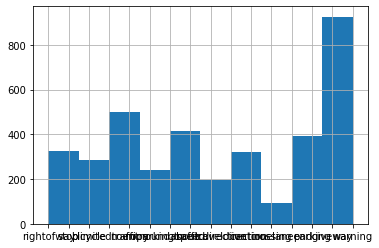

,image_path,label,isVal
0,./trafficsigns_dataset\diamond\rightofway\0003...,rightofway,0
1,./trafficsigns_dataset\diamond\rightofway\0003...,rightofway,0
2,./trafficsigns_dataset\diamond\rightofway\0003...,rightofway,0
3,./trafficsigns_dataset\diamond\rightofway\0003...,rightofway,0
4,./trafficsigns_dataset\diamond\rightofway\0003...,rightofway,0


In [5]:
data.label.hist()
#plt.rcParams["figure.figsize"] = (15,15)
plt.show()

data[data['isVal']==0].head()

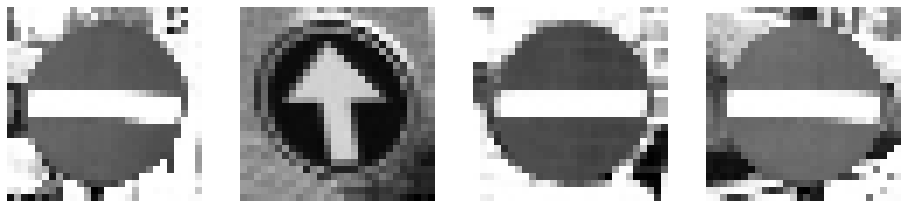

In [6]:
r_inx = np.random.choice(3000, 4)
rand_data = data.loc[r_inx,'image_path']

plt.figure(figsize=(16,4))
for i, image_path in enumerate(rand_data):
    im = np.asarray(Image.open(image_path))
    plt.subplot(1,4,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')
    
plt.show()

In [7]:
d = {'rightofway':0, 'stop':1, 'bicycle':2, 'limitedtraffic':3, 'noentry':4, 'noparking':5, 'roundabout':6, 'speed':7, 'trafficdirective':8, 'traveldirection':9, 'continue':10, 'crossing':11, 'laneend':12, 'parking':13, 'giveway':14, 'warning':15}
data['labels_num'] = data['label'].map(d, na_action='ignore')

In [8]:
train_df = data[data['isVal']==0].reset_index()
validation_df = data[data['isVal']==1].reset_index()
print('Train size: {}, Val size: {}'.format(train_df.shape[0], validation_df.shape[0] ) )
N_train_images = train_df.shape[0]
N_val_images = validation_df.shape[0]

train_df.to_csv('SignTrainData.csv')
validation_df.to_csv('SignValData.csv')

Train size: 3699, Val size: 0


In [9]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('./SignTrainData.csv')

train_df, validation_df = train_test_split(train_df, test_size=0.2, random_state=42)

print("Train data : {}, Val Data: {}".format(train_df.shape[0], validation_df.shape[0]))

Train data : 2959, Val Data: 740


In [10]:
INPUT_DIM = (28,28,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 16

In [11]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2352)              0         
                                                                 
 dense (Dense)               (None, 256)               602368    
                                                                 
 dense_1 (Dense)             (None, 16)                4112      
                                                                 
Total params: 606,480
Trainable params: 606,480
Non-trainable params: 0
_________________________________________________________________


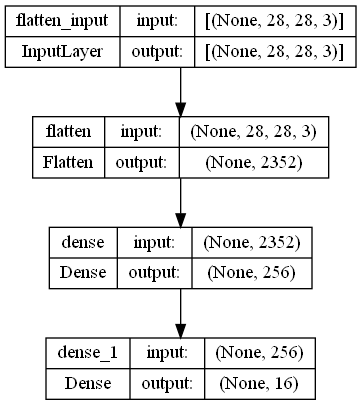

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [14]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory='./',
        x_col="image_path",
        y_col="label",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=validation_df,
        directory='./',
        x_col="image_path",
        y_col="label",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2959 validated image filenames belonging to 16 classes.
Found 740 validated image filenames belonging to 16 classes.


## Training the Model

In [16]:
history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=150, verbose=0)

C:\Users\lakin\AppData\Local\Temp\ipykernel_2484\2399507332.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=150, verbose=0)


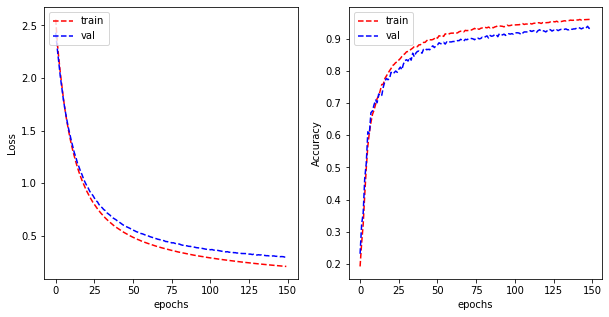

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'], 'r--')
plt.plot(history.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

## Applying regularisation

In [18]:
reg_lambda = 0.01

model_reg = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES, kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

In [19]:
model_reg.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [20]:
history_reg = model_reg.fit_generator(train_generator, validation_data = validation_generator, epochs=150, verbose=0)

C:\Users\lakin\AppData\Local\Temp\ipykernel_2484\4290883935.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_reg = model_reg.fit_generator(train_generator, validation_data = validation_generator, epochs=150, verbose=0)


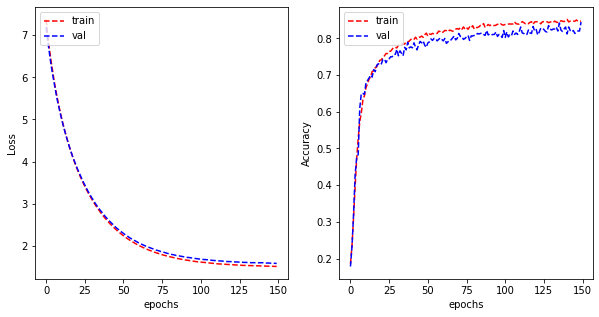

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_reg.history['loss'], 'r--')
plt.plot(history_reg.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_reg.history['categorical_accuracy'], 'r--')
plt.plot(history_reg.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

## Dropout

In [ ]:
reg_lambda = 0.01

model_drop = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

In [23]:
model_drop.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [24]:
history_drop = model_drop.fit_generator(train_generator, validation_data = validation_generator, epochs=150, verbose=0)

C:\Users\lakin\AppData\Local\Temp\ipykernel_2484\3593438189.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_drop = model_drop.fit_generator(train_generator, validation_data = validation_generator, epochs=150, verbose=0)


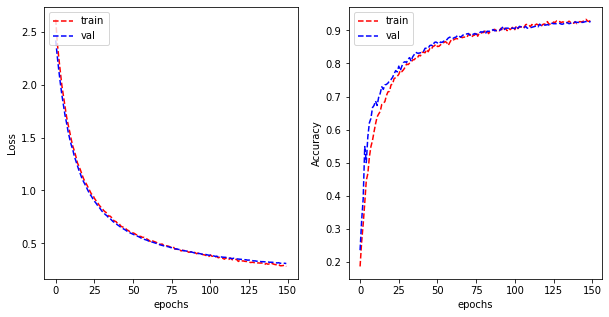

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_drop.history['loss'], 'r--')
plt.plot(history_drop.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_drop.history['categorical_accuracy'], 'r--')
plt.plot(history_drop.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

In [26]:
model.save("base_model")

INFO:tensorflow:Assets written to: base_model\assets


In [27]:
base_model = tf.keras.models.load_model('base_model')

In [28]:
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size_t = 1

# Here the validation is used for testing and this should be changes to a separate test set.
test_generator = train_datagen.flow_from_dataframe(
        dataframe=validation_df,
        directory='./',
        x_col="image_path",
        y_col="label",
        target_size=(28, 28),
        batch_size=batch_size_t,
        class_mode='categorical')

Found 740 validated image filenames belonging to 16 classes.


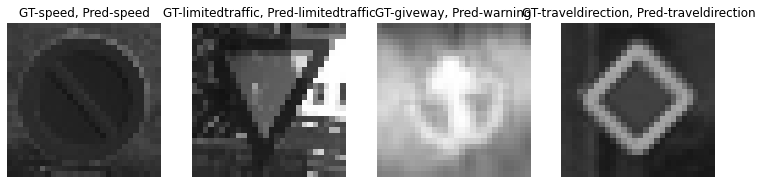

In [29]:
d_inv = {v: k for k, v in d.items()}
plt.figure(figsize=(16,4))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model_reg.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

## Test Data

#### Now testing the data on our own test data which we imported as a part of independent evaluation

In [43]:
import zipfile
with zipfile.ZipFile('./test_signs.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [44]:
test_data = []

In [47]:
image_list = []
for filepath in glob.glob('./test_signs\\*\\*\\*.png', recursive=True):
    filename = filepath.split("\\")[-1]
    shape = filepath.split("\\")[-2] #shape of signs
    sign = filepath.split("\\")[-3] #type of sign 
    polenumber = filename.split("_")[-1]
    test = shape in test_data
    image_list.append((filepath, shape))

#creating dataframe    
data = pd.DataFrame(data=image_list, columns=['image_path', 'label'])

data['label'].unique()
data.head()

,image_path,label
0,./test_signs\DATA\1\stop1.png,1
1,./test_signs\DATA\1\stop2.png,1
2,./test_signs\DATA\10\continue1.png,10
3,./test_signs\DATA\10\continue2.png,10
4,./test_signs\DATA\11\crossing1.png,11


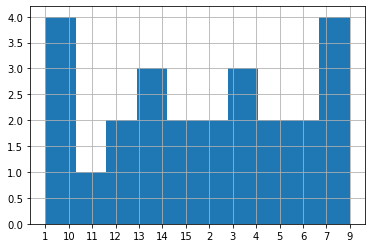

In [48]:
data.label.hist()
#plt.rcParams["figure.figsize"] = (15,15)
plt.show()

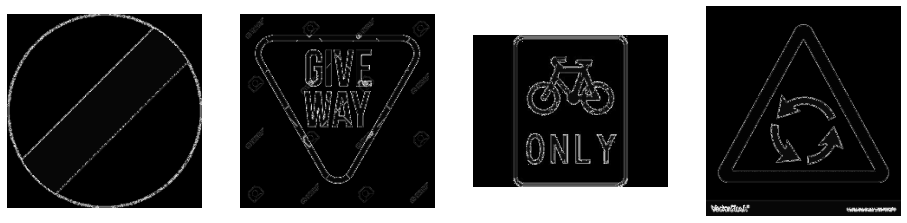

In [50]:
r_inx = np.random.choice(20, 4)
rand_data = data.loc[r_inx,'image_path']

plt.figure(figsize=(16,4))
for i, image_path in enumerate(rand_data):
    im = np.asarray(Image.open(image_path))
    plt.subplot(1,4,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')
    
plt.show()

In [51]:
test_df = data.reset_index()
print('Test size: {}'.format(test_df.shape[0]) )
N_train_images = train_df.shape[0]
N_val_images = validation_df.shape[0]

test_df.to_csv('SignTestData.csv')

Test size: 25


In [52]:
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size_t = 1

# Here the validation is used for testing and this should be changes to a separate test set.
test_generator = train_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory='./',
        x_col="image_path",
        y_col="label",
        target_size=(28, 28),
        batch_size=batch_size_t,
        class_mode='categorical')

Found 25 validated image filenames belonging to 14 classes.


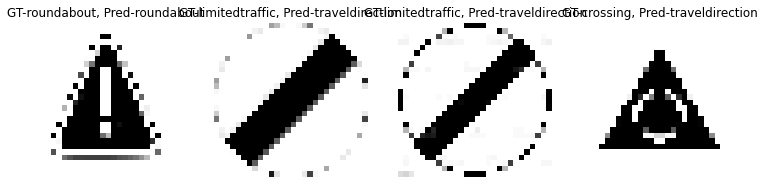

In [54]:
d_inv = {v: k for k, v in d.items()}
plt.figure(figsize=(16,4))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model_reg.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')